## Analytical solution for the magnet configuration

In [85]:
# imports
import numpy as np
from scipy import special as scp
from math import factorial as factorial
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [108]:
class Magnets:
    """
    A class to simulate the cyllindrical magnets used in the Cd MOT.
    
    Attributes (all floats)
    ----------
    
    h: Height of the magnets in the z-direction (the beam direction) in cm
    R_out: outer radius of the magnets used in cm
    R_in: inner radius of the magnets used in cm
    M: magnetisation
    """
    def __init__(self, h=1., R_out=2., R_in=1.5, M=1):
        self.h = h
        self.R_out = R_out
        self.R_in = R_in
        self.M = M
        
    
    def ComputeField(self, r=10, z=10, n=10, gran=100): # n needs to be float for numpy to correctly use it for negative powers (floating point precision may not be great)
        """
        Computes the field for the given spatial range to a given accuracy.
        
        Attributes
        ----------
        r: range of coordinate r in cm (integer)
        z: range of coordinate z in cm (integer)
        n: number of terms in approximation (integer)
        gran: granularity - number of divisions of the r and z coordinates
        """
        if type(r) != int or type(z) != int:
            raise Exception("r and z can only be integers") # change in the future, maybe np arange
        self.r = np.linspace(0,r,gran) # create a list of r and z coordinates
        self.z = np.linspace(0,z,gran)
        n = np.arange(n) 
        self.n = n
        
        xMinus_Rlist = [] # for each r calculate the list of z-dependent x- values 
        xPlus_Rlist = [] # and x+
        
        for Zcoord in self.z:
            xMinus_Rlist.append(-(self.R_out**2)/(self.r**2+(self.h+Zcoord)**2))
            xPlus_Rlist.append(-(self.R_out**2)/(self.r**2-(self.h+Zcoord)**2))
        print(xPlus_Rlist)    
        
        potential_terms = [] # list of 2d lists (potential values on a component grid) for each term 
        for i in n:
            a = 1 + i
            b = 0.5 - (2*i)
            Rpotentials = [] # again a list of z-dependent values for each r
            for j in range(len(xMinus_Rlist)): # len(xMinus_Rlist) = gran ? minor speed improvement 
                # n-dependent term in the potential:
                scaling = (scp.factorial2(4*i-1)*((-1)**(-float(i)))*(self.r[j]**(2*i)))/((2**(2*i))*((factorial(i))**2))
                #print(scaling)
                # calculate beta coefficients:
                betaMinus = ((self.r[j]**2+(self.h-self.z)**2)**(0.5-i)) * scp.betainc(a,b,xMinus_Rlist[j]) #z and Rlist[j] should be done pairwise
                betaPlus = ((self.r[j]**2+(self.h+self.z)**2)**(0.5-i)) * scp.betainc(a,b,xPlus_Rlist[j])
                #print(betaPlus)
                # calculate the z-dependent potential values list:
                potentials = 0.5*self.M * scaling * (betaPlus-betaMinus)
                Rpotentials.append(potentials) # append the potential values to potentials list
            print(len(Rpotentials))
            print(len(Rpotentials[0]))
            potential_terms.append(np.array(Rpotentials)) # append the potentials list to the master list
            print(len(potential_terms))
            # np.array structure neccessary for element-wise addition later on
        
        self.potential_terms = sum(potential_terms) # sum the elements of potential_terms element-wise to get one 2d list
        
        #self.field = # use sympy for differentiation
    
    def ChangeMag(self, newMag):
        self.M = newMag

In [109]:
magnet2 = Magnets()
magnet2.ComputeField()
magnet2.potential_terms

[array([-4.00000000e+00, -4.04123286e+00, -4.17019466e+00, -4.40444894e+00,
       -4.78039264e+00, -5.36967539e+00, -6.32220610e+00, -7.99918384e+00,
       -1.15271979e+01, -2.30476190e+01,  1.97005025e+02,  1.70526316e+01,
        8.52446184e+00,  5.52246795e+00,  4.00081641e+00,  3.08717222e+00,
        2.48142287e+00,  2.05267291e+00,  1.73476703e+00,  1.49070307e+00,
        1.29818868e+00,  1.14300708e+00,  1.01567398e+00,  9.09626673e-01,
        8.20184523e-01,  7.43923035e-01,  6.78281631e-01,  6.21309371e-01,
        5.71495211e-01,  5.27651785e-01,  4.88834025e-01,  4.54281046e-01,
        4.23373903e-01,  3.95604396e-01,  3.70551707e-01,  3.47864666e-01,
        3.27248141e-01,  3.08452466e-01,  2.91265165e-01,  2.75504396e-01,
        2.61013722e-01,  2.47657913e-01,  2.35319540e-01,  2.23896196e-01,
        2.13298223e-01,  2.03446826e-01,  1.94272519e-01,  1.85713812e-01,
        1.77716127e-01,  1.70230874e-01,  1.63214668e-01,  1.56628672e-01,
        1.50438029e-01, 

100
100
10


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

<ipython-input-33-2eabde553e0f>:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ha.plot_surface(X, Y, data)


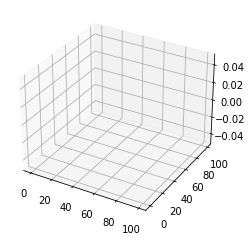

In [33]:
# plot the potential field

# Set up grid and test data
nx, ny = len(magnet2.r), len(magnet2.z)
x = range(nx)
y = range(ny)

data = magnet2.potential_terms

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

plt.show()

In [95]:
x = np.array([1,2,3,4,5])
for i in range(3):
    a = 1 + i   
    b = 0.5 - (2*i)
    print(scp.betainc(x,a,b))

[0.5     0.25    0.125   0.0625  0.03125]
[nan nan nan nan nan]
[nan nan nan nan nan]
